In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics

In [51]:
car_dataset = pd.read_csv('car data.csv')

In [52]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [54]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [55]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [56]:
car_dataset.shape

(301, 9)

In [57]:
#checking the distribution of categorical data

print(car_dataset['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [58]:
print(car_dataset['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [59]:
print(car_dataset['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Data Preprocessing

# Encoding the Categorical Data

In [60]:
car_dataset=car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':3}})
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [61]:
car_dataset=car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}})
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [62]:
car_dataset['Seller_Type'].value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [63]:
car_dataset=car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}})
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [64]:
car_dataset.drop(columns=['Car_Name'],inplace=True)

In [65]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


# Train Test Split

In [66]:
X= car_dataset.drop(columns=['Selling_Price'])
y = car_dataset['Selling_Price']

In [67]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [68]:
X.shape

(301, 7)

In [69]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

# Model Training

In [71]:
model= LinearRegression()

In [72]:
model.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [73]:
#predcition on training data
y_train_pred = model.predict(X_train)

In [74]:
#R squared error

score = metrics.r2_score(y_train,y_train_pred)
print("Error Score",score)

Error Score 0.8773595725300621


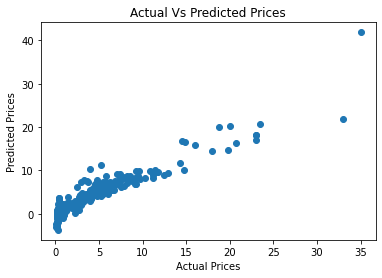

In [75]:
#visualize the actual and predicted prices

plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Vs Predicted Prices')
plt.show()

In [76]:
y_test_pred = model.predict(X_test)

In [77]:
score = metrics.r2_score(y_test,y_test_pred)
print("Error Score",score)

Error Score 0.8367737467277874


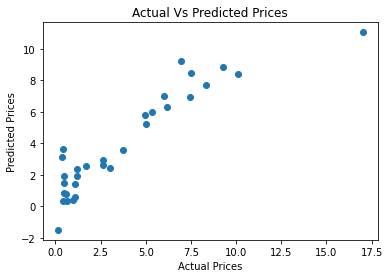

In [78]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Vs Predicted Prices')
plt.show()

# lasso Regression

In [79]:
model = Lasso()

In [80]:
model.fit(X_train,y_train)

Lasso()

In [81]:
y_train_pred=model.predict(X_train)

In [82]:
score = metrics.r2_score(y_train,y_train_pred)
print("Error Score",score)

Error Score 0.8436909482009373


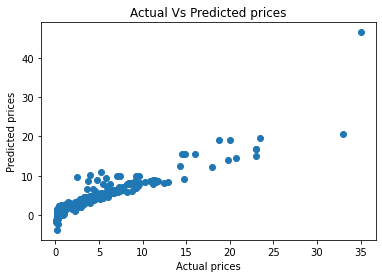

In [83]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual Vs Predicted prices')
plt.show()

In [84]:
y_test_pred = model.predict(X_test)

In [85]:
score = metrics.r2_score(y_test,y_test_pred)
print("Error score ",score)

Error score  0.839226320049874


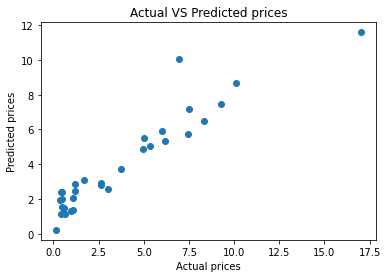

In [86]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual VS Predicted prices')
plt.show()